# Importing Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# For Standardizing features. We will use the StandardScalar module
from sklearn.preprocessing import StandardScaler
# We will Use KMeans and PCA Modules from skLearn
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
#TSNE
from sklearn.manifold import TSNE
import time

#Acquring the Data:)

In [3]:
url = "/content/Assignment_Data - Sheet1.csv"
df = pd.read_csv(url)

In [ ]:
#The data we’ve has 208 observations and 32 features.

#Data PreProcessing



In [4]:
res = []
for i in df.columns:
  li = df[i].tolist()
  res.append(li)
res = res[1]  
ans = []
for item in res:
  ans.append(eval(item))

#Standardization


In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(ans)

# **Perform Dimensionality Reduction**

#First, let's fit our standardized data using PCA

In [6]:
pca = PCA()
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Second, we need to decide how many features we'd like to keep based on the cumulative variance plot.

In [7]:
# The attribute shows how much variance is explained by each of the 32 components.
pca.explained_variance_ratio_

array([0.10059801, 0.08380511, 0.07482225, 0.06408716, 0.06131705,
       0.05785574, 0.05228896, 0.04429722, 0.04206399, 0.03903931,
       0.03517441, 0.03194024, 0.03026901, 0.02880379, 0.02788279,
       0.02559802, 0.02299464, 0.0215301 , 0.02111541, 0.01759639,
       0.01659739, 0.01586788, 0.01148257, 0.01094201, 0.01042593,
       0.00982352, 0.00878127, 0.00854517, 0.00711796, 0.00683487,
       0.00570981, 0.00479201])

Text(0, 0.5, 'Cumalative Explained Varience')

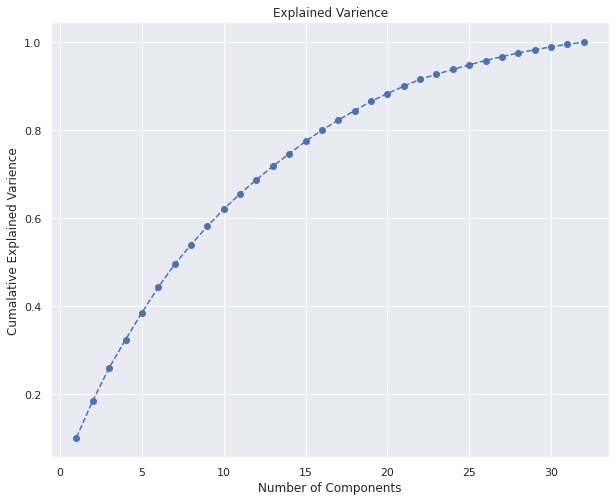

In [8]:
plt.figure(figsize = (10,8))
plt.plot(range(1,33),pca.explained_variance_ratio_.cumsum(), marker='o', linestyle = '--')
plt.title("Explained Varience")
plt.xlabel("Number of Components")
plt.ylabel("Cumalative Explained Varience")

Third step, we perform PCA with chosen numbers of components.

In [9]:
# we choose 8 components. 7/8 seems the right according to the previous graph
pca = PCA(n_components=8) 

In [10]:
# Fit the model to our data with the selected number of components. In our Case Eight.
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

#Now we only need the Calculated resulting components scores for the elements in our data set.

In [11]:
pca.transform(scaled_data)

array([[ 4.10532489, -4.33427349,  2.00591072, ..., -3.51571222,
         1.29856487,  1.09139941],
       [ 5.06041313,  5.4759197 ,  1.31689727, ..., -0.90647544,
         0.16560407,  1.05141768],
       [ 2.7538339 ,  4.69331294,  0.01967278, ..., -1.25244524,
         5.64564063,  0.81232591],
       ...,
       [ 4.03905658, -4.25961138,  1.99336591, ..., -3.50141591,
         1.29854614,  1.1034305 ],
       [ 4.0223808 , -4.24894424,  1.99069648, ..., -3.489055  ,
         1.3018014 ,  1.10464745],
       [ 4.03593215, -4.25930218,  2.01433167, ..., -3.47495987,
         1.30546057,  1.09601971]])

In [12]:
score_pca = pca.transform(scaled_data)

In [13]:
start = time.time()
pca_50 = PCA(n_components=8)
# pca_result_50 = pca_50.fit_transform(scaled_data)
tsne = TSNE(random_state = 42, n_components=3,verbose=0, perplexity=40, n_iter=400).fit_transform(scaled_data)
print('Duration: {} seconds'.format(time.time() - start))

Duration: 1.792081594467163 seconds


#Now we will incorporate the newly obtained PCA scores in the K-Means algorithm

First, we must decide how many clustering solutions we'd test.

In [14]:
# We fit k means the transformed data from the PCA
wcss = []
for i in range(1,21):
  kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans_pca.fit(score_pca)
  wcss.append(kmeans_pca.inertia_)


Now as a next step let's plot WCSS vs number of components 

Text(0, 0.5, 'WCSS')

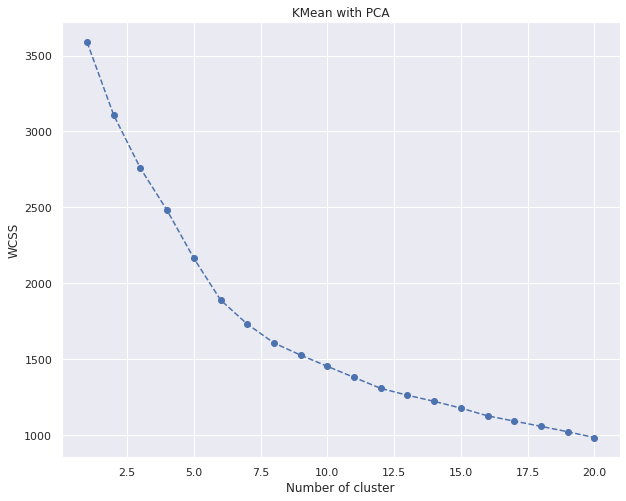

In [15]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker='o', linestyle = '--')
plt.title("KMean with PCA")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")

#In the cluster-predict methodology, we can evaluate how well the models are performing based on different K clusters since clusters are used in the downstream modeling. We’ll test over two metrics that may give us some intuition about k:

1)Elbow method

2)Silhouette analysis

#"Elbow Method"

In [16]:
#To Determine the number of clusters we'd like to Keep, we use the Elbow-method.
# Looking for Kink in WCSS graph, usually he part of the graph before the elbow would be steeply declining, while the part after it – much smoother.
# We have Chosen 5 Clusters, so we run K-Means with number of clusters equals 5.
# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters= 5, init = 'k-means++', random_state=42)

In [17]:
# We fit our data with the K-means pca model
kmeans_pca.fit(score_pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

#"Silhouette Analysis"

0.1113634565183001
0.09895545485133714
0.09965362901946334
0.08360984733989528
0.08799020391904497
0.09743290461316663


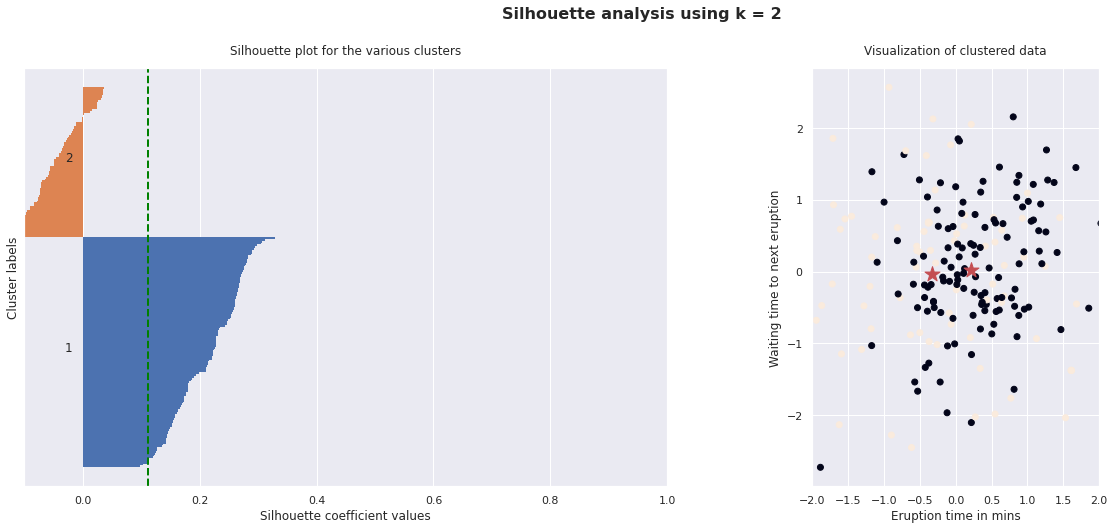

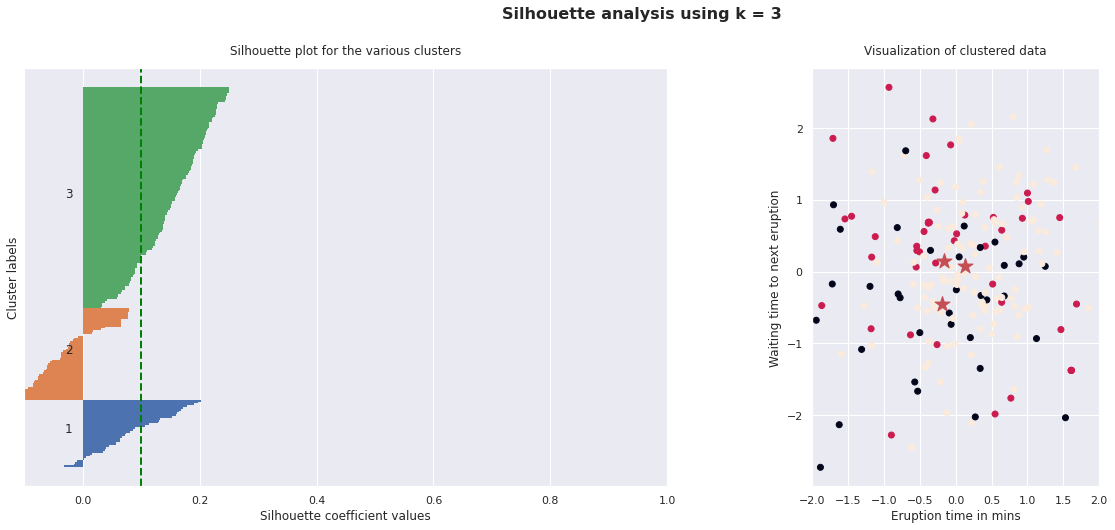

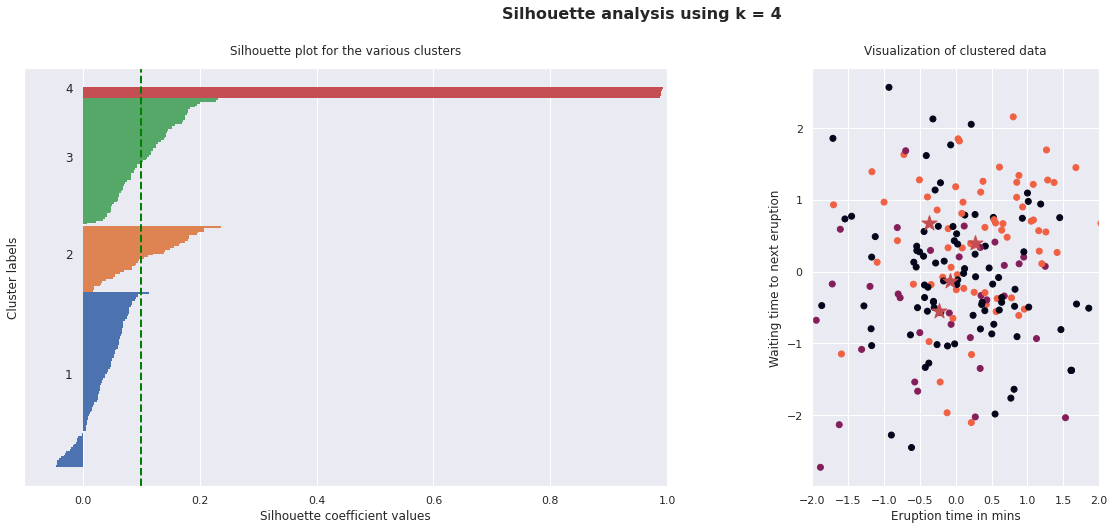

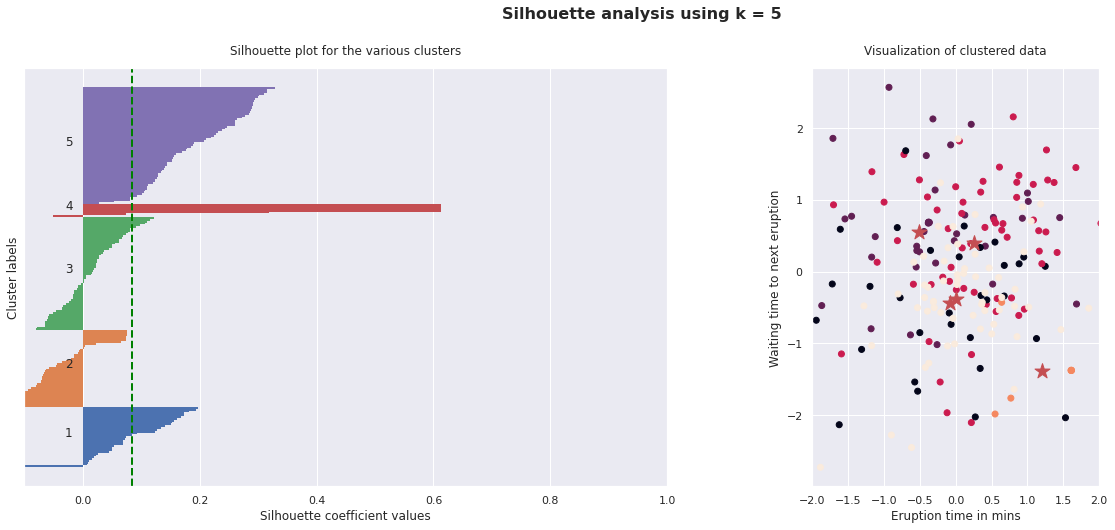

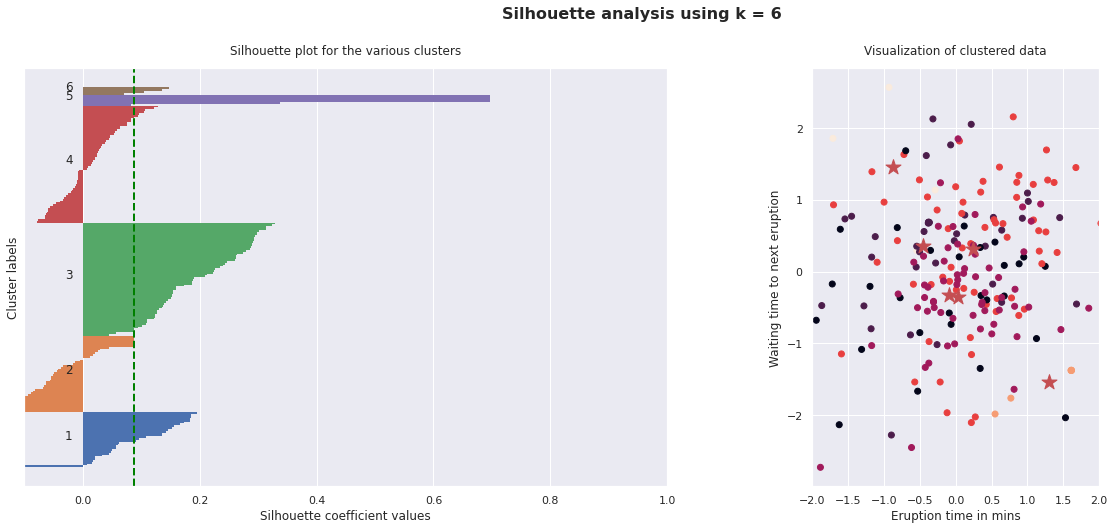

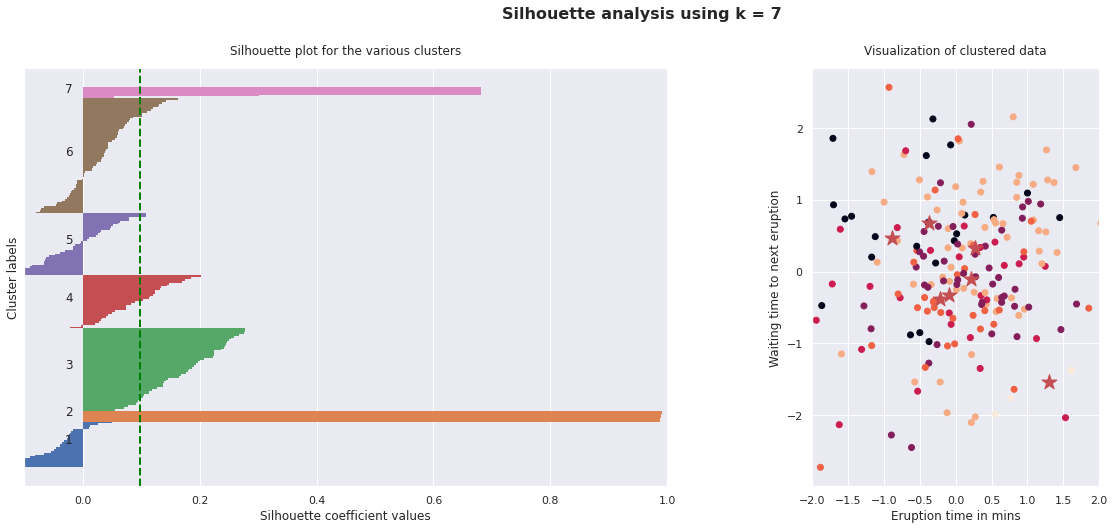

In [18]:
for i, k in enumerate([2, 3, 4, 5, 6, 7]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(scaled_data)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(scaled_data, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    print(avg_score)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

average_silhouette_score =  [0.11488636943433322, 0.09357230845182711, 0.12495269134493207,0.1058259024564672,
 0.1147878994291697,0.12642887083175725]

 As we can Clearly see that the best average silhouette score of around 0.127 which is for K=5
 so for our KMeans the value of n_clusters=5

#Visualizing the results of PCA and K-means Clustering 

In [19]:
# K-means clustering with PCA Results.
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(score_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-8: ] = ['Component 1','Component 2','Component 3','Component 4','Component 5','Component 6','Component 7','Component 8']
# The last column we add contains the PCA K-means clustering labels.
df_segm_pca_kmeans['Segement K-means PCA'] = kmeans_pca.labels_

In [20]:
df_segm_pca_kmeans.head()

,Postid,Embedding,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Segement K-means PCA
0,1,"[-0.0500004, 0.399185, 0.248388, -0.0215441, -...",4.105325,-4.334273,2.005911,-0.700438,0.757098,-3.515712,1.298565,1.091399,2
1,2,"[0.881677, -0.565129, 0.749753, -0.0707093, 0....",5.060413,5.475920,1.316897,-0.878023,-3.628964,-0.906475,0.165604,1.051418,4
2,3,"[0.38087, -0.850056, -0.78907, -0.603287, -0.4...",2.753834,4.693313,0.019673,1.270886,-0.064962,-1.252445,5.645641,0.812326,4
3,4,"[0.22537, -0.905855, -0.139464, 0.162311, 0.42...",-1.322692,0.559609,-1.237368,2.228377,-0.994488,-1.497921,1.429613,0.100188,0
4,5,"[0.537189, 0.70545, 0.633751, 0.287782, 0.4376...",-0.924589,2.146801,-0.635789,0.805177,-0.039482,-1.375483,-1.305140,-0.213520,0


Let's Add the names of the segment to the labels.

In [21]:
# We create a new column named 'Segment' and map the 5 clusters directly inside it.
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segement K-means PCA'].map({
    0:'First',1:'Second',2:'Third',3:'Fourth',4:'Fifth',5:'Sixth'
})

#Finally Let's Visualize Clusters by Components.

In [22]:
# Let's visualize the segment with respect to 1st 3 components.
fig = px.scatter_3d(df_segm_pca_kmeans, x='Component 1', y='Component 2', z= 'Component 3',
                    color = 'Segment', title="3D Scatter Plot")

fig.show()


#t-sne with K-means

In [23]:
wcss = []
for i in range(1,21):
  kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans_pca.fit(tsne)
  wcss.append(kmeans_pca.inertia_)

Text(0, 0.5, 'WCSS')

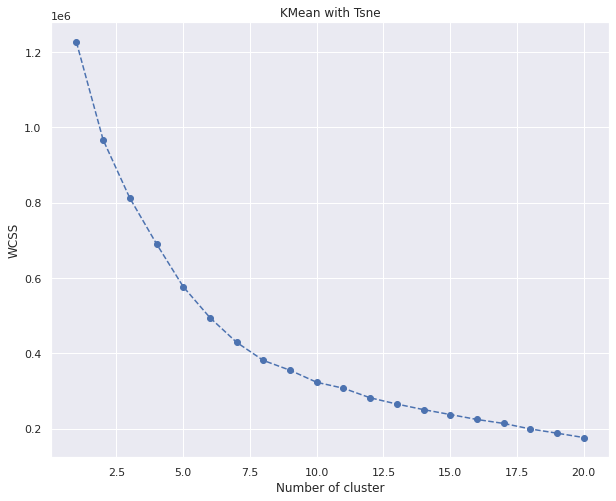

In [24]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker='o', linestyle = '--')
plt.title("KMean with Tsne")
plt.xlabel("Number of cluster")
plt.ylabel("WCSS")

In [25]:
#To Determine the number of clusters we'd like to Keep, we use the Elbow-method.
# Looking for Kink in WCSS graph, usually he part of the graph before the elbow would be steeply declining, while the part after it – much smoother.
# We have Chosen 5 Clusters, so we run K-Means with number of clusters equals 5.
# Same initializer and random state as before.
kmeans_tsne = KMeans(n_clusters= 5, init = 'k-means++', random_state=42)

In [26]:
# We fit our data with the K-means pca model
kmeans_pca.fit(tsne)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

0.11531138186485197
0.09972803896380765
0.12234593092071168
0.1490956584521426
0.1145467015041788
0.1264577238335055


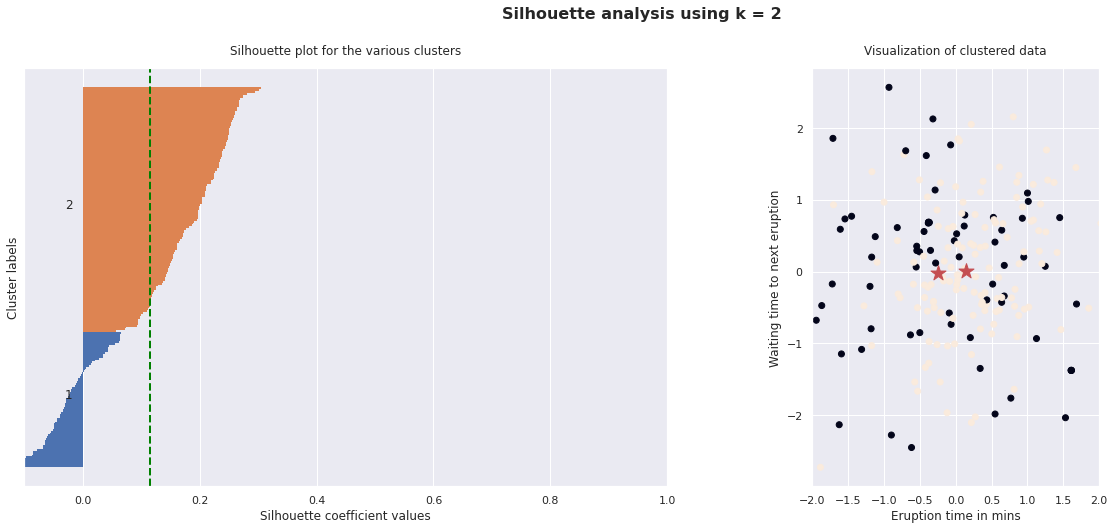

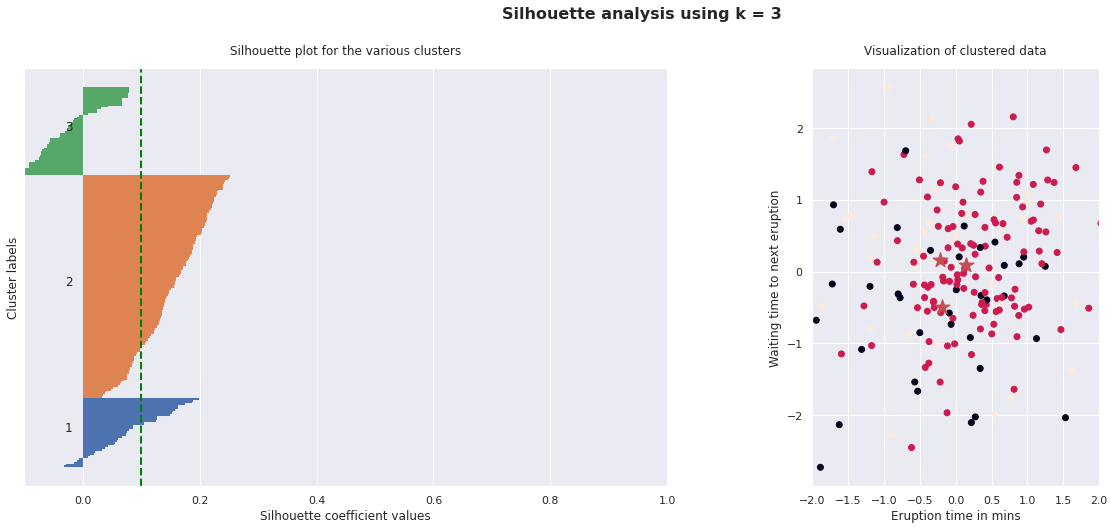

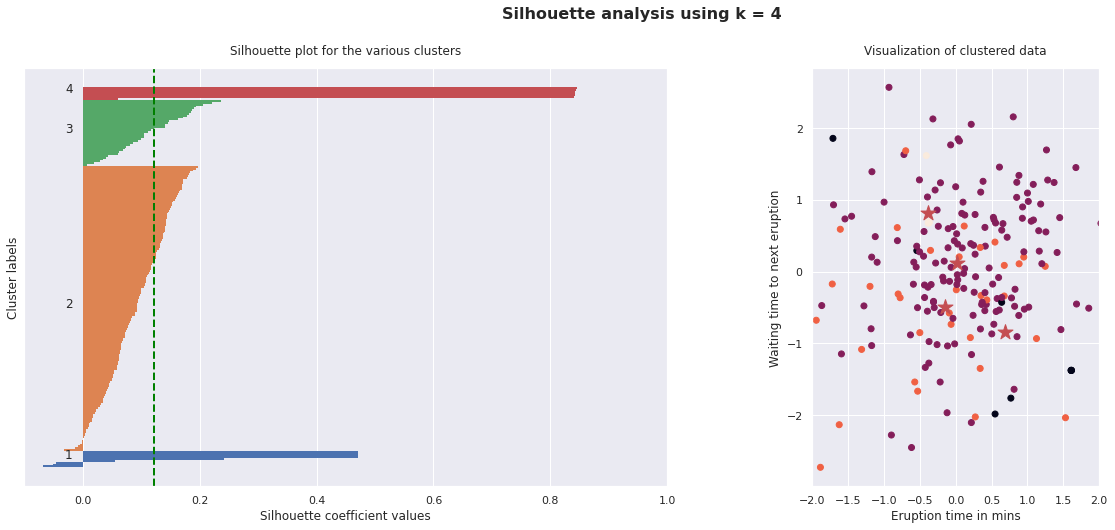

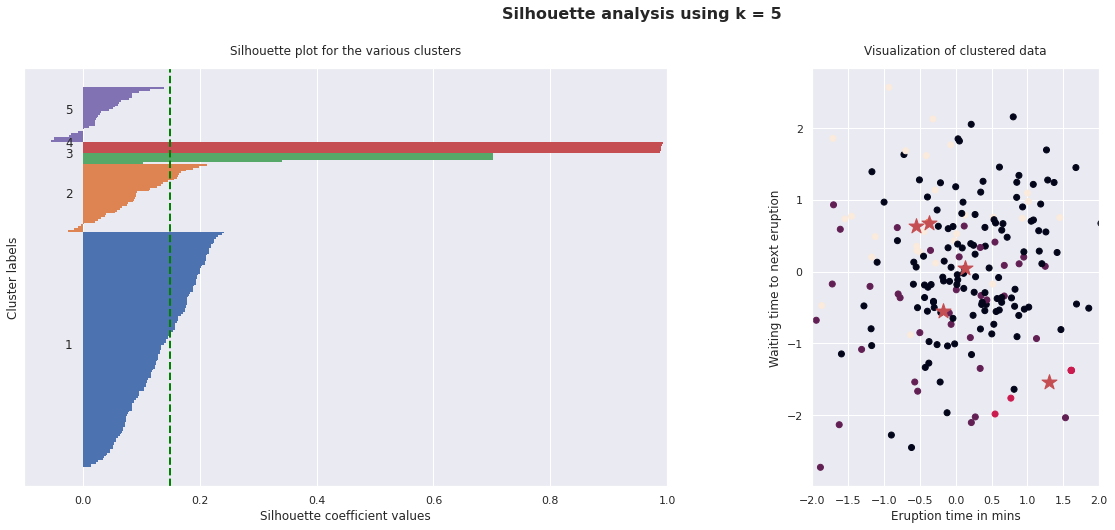

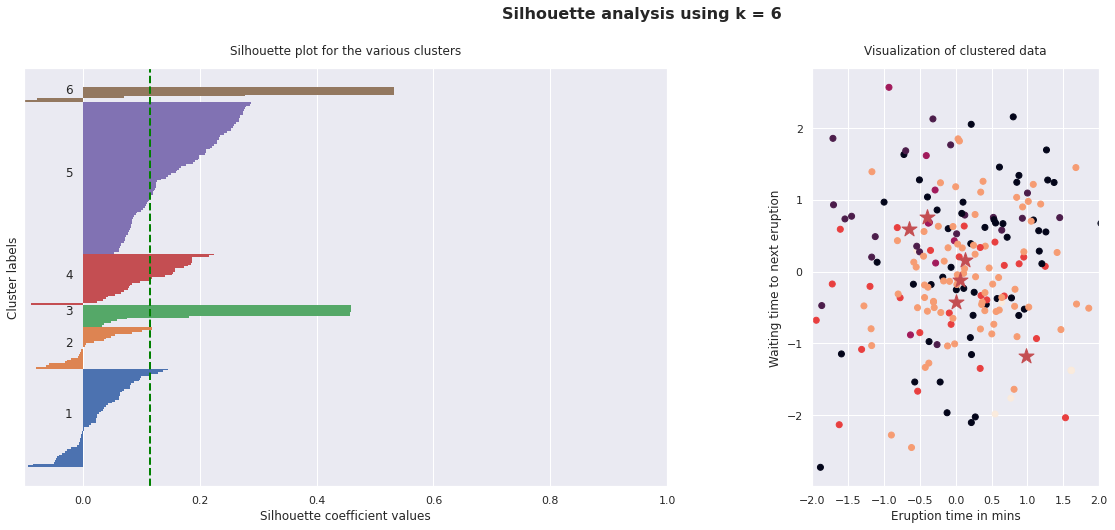

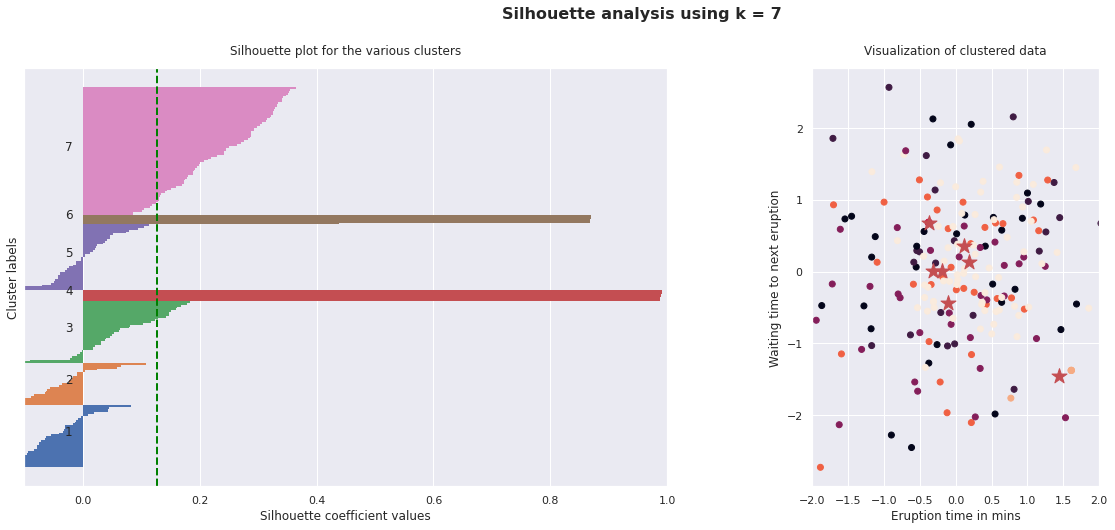

In [27]:
for i, k in enumerate([2, 3, 4, 5, 6, 7]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(scaled_data)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(scaled_data, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    print(avg_score)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

#Visualizing the results of t-sne and K-means Clustering 

In [28]:
# K-means clustering with T-SNE Results.
# We create a new data frame with the original features and add the t-SNE scores and assigned clusters.
df_segm_tsne_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(tsne)], axis = 1)
df_segm_tsne_kmeans.columns.values[-5: ] = ['Component 1','Component 2','Component 3','Component 4','Component 5']
# The last column we add contains the t-SNE K-means clustering labels.
df_segm_tsne_kmeans['Segement K-means t-SNE'] = kmeans_pca.labels_

In [30]:
# We create a new column named 'Segment' and map the 5 clusters directly inside it.
df_segm_tsne_kmeans['Segment'] = df_segm_tsne_kmeans['Segement K-means t-SNE'].map({
    0:'First',1:'Second',2:'Third',3:'Fourth',4:'Fifth',5:'Sixth'
})

In [ ]:
df_segm_tsne_kmeans['Segment']

In [42]:
# Let's visualize the segment with respect to 1st 3 components.
fig = px.scatter(df_segm_tsne_kmeans, x='Component 1', y='Component 5',color="Component 1",title="2D Scatter Plot")

fig.show()